In [80]:
import os 

notebook_dir = os.path.abspath(os.getcwd())
project_root = os.path.dirname(notebook_dir)

csv_path = os.path.join(project_root, "data/raw/resume.csv")

In [104]:
import re
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize

In [82]:
df = pd.read_csv(csv_path)
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [83]:
df.columns = df.columns.str.lower()

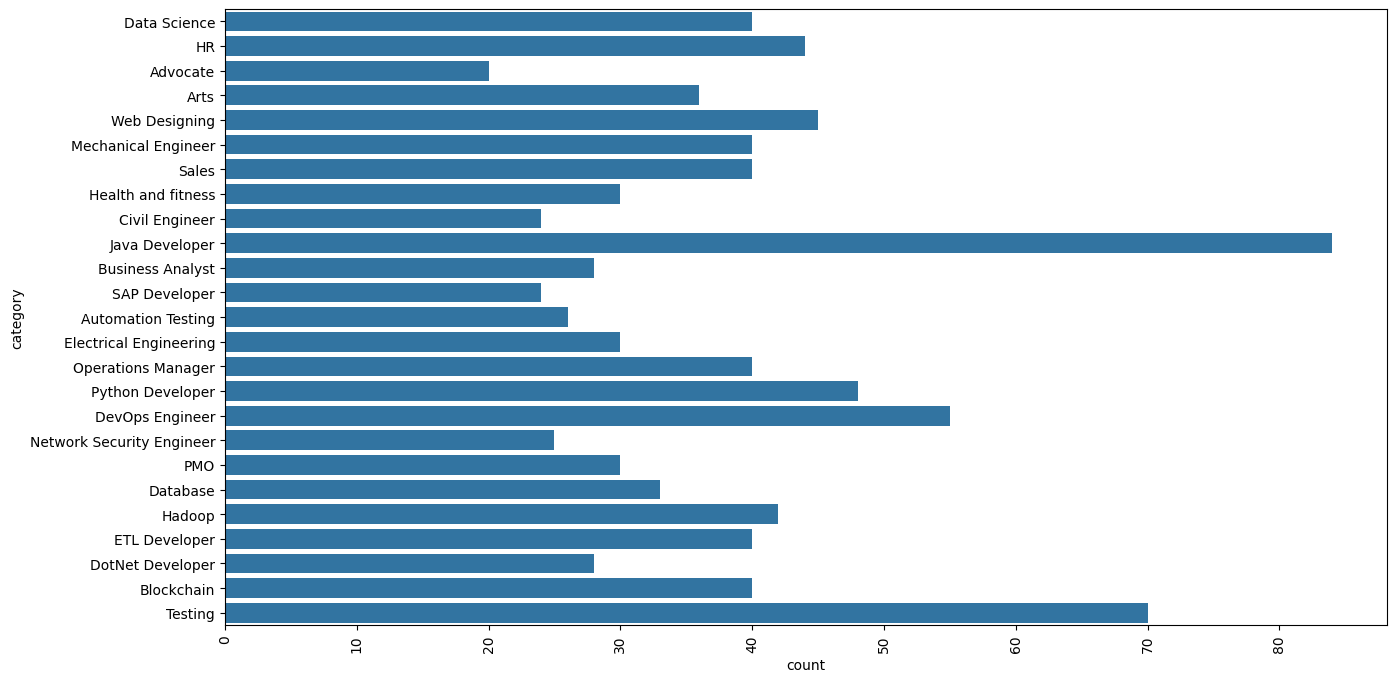

In [84]:
plt.figure(figsize=(15, 8))
sns.countplot(df["category"])
plt.xticks(rotation=90)
plt.show()

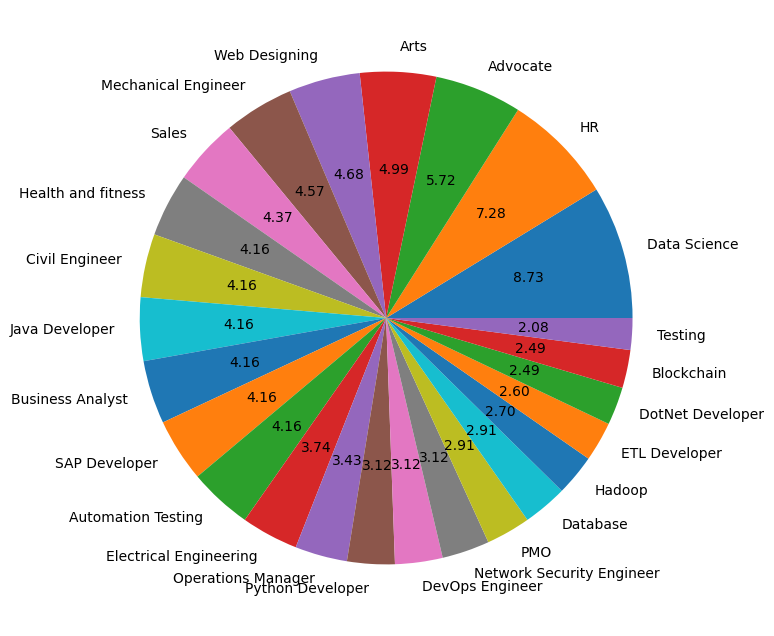

In [85]:
plt.figure(figsize=(12, 8))
plt.pie(df["category"].value_counts(), labels=df["category"].unique(), autopct="%0.2f")
plt.show()

In [86]:
le = LabelEncoder()
df["category"] = le.fit_transform(df["category"])
df["category"].value_counts()

category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [87]:
df["resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [88]:
def clean_resume(text):
    url_pattern = re.compile(r'http\S+')
    rt_cc_pattern = re.compile(r'\bRT\b|\bcc\b', re.IGNORECASE)
    hashtag_pattern = re.compile(r'#\S+')
    mention_pattern = re.compile(r'@\S+')
    special_char_pattern = re.compile(r'[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~]')
    non_ascii_pattern = re.compile(r'[^\x00-\x7f]')
    extra_spaces_pattern = re.compile(r'\s+')

    text = url_pattern.sub(' ', text)
    text = rt_cc_pattern.sub(' ', text)
    text = hashtag_pattern.sub(' ', text)
    text = mention_pattern.sub(' ', text)
    text = special_char_pattern.sub(' ', text)
    text = non_ascii_pattern.sub(' ', text)
    text = extra_spaces_pattern.sub(' ', text)
    
    text = text.lower().strip()
    
    return text

In [89]:
df["resume"].apply(clean_resume)

0      skills programming languages python pandas num...
1      education details may 2013 to may 2017 b e uit...
2      areas of interest deep learning control system...
3      skills r python sap hana tableau sap hana sql ...
4      education details mca ymcaust faridabad haryan...
                             ...                        
957    computer skills proficient in ms office word b...
958    willingness to accept the challenges positive ...
959    personal skills quick learner eagerness to lea...
960    computer skills software knowledge ms power po...
961    skill set os windows xp 7 8 8 1 10 database my...
Name: resume, Length: 962, dtype: object

In [90]:
df["resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [91]:
def text_transform(text: str):
    text = text.lower()
    text = word_tokenize(text)
    y = []
    for words in text:
        if words.isalnum():
            y.append(words)
    return " ".join(y)

In [92]:
df["resume"] = df["resume"].apply(text_transform)
df.head()

,category,resume
0,6,skills programming languages python pandas num...
1,6,education details may 2013 to may 2017 data sc...
2,6,areas of interest deep learning control system...
3,6,skills r python sap hana tableau sap hana sql ...
4,6,education details mca ymcaust faridabad haryan...


In [93]:
df["word_count"] = df["resume"].apply(lambda x: len(word_tokenize(x)))

In [95]:
df.head()

,category,resume,word_count
0,6,skills programming languages python pandas num...,615
1,6,education details may 2013 to may 2017 data sc...,136
2,6,areas of interest deep learning control system...,234
3,6,skills r python sap hana tableau sap hana sql ...,904
4,6,education details mca ymcaust faridabad haryan...,55


<Axes: >

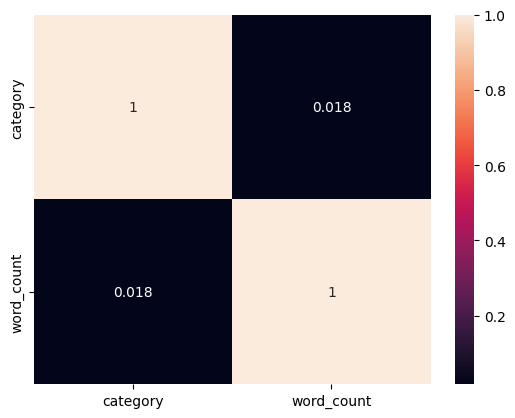

In [98]:
df_num = df.drop(columns=["resume"])
sns.heatmap(df_num.corr(), annot=True)

<Axes: xlabel='category', ylabel='word_count'>

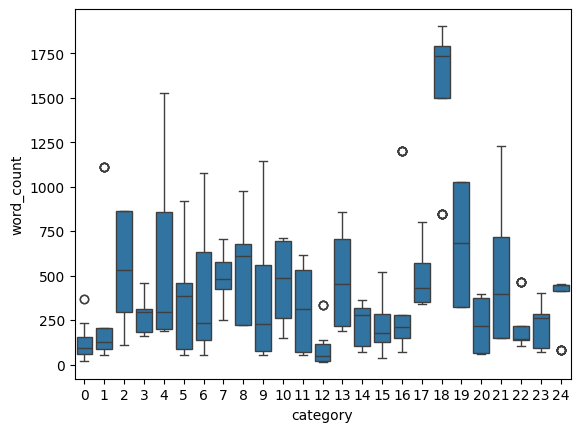

In [100]:
sns.boxplot(x=df['category'], y=df["word_count"])

## As we can see from this Exploratory Data Analysis, the data is widley and almost equally spread, expect some outliers here and there.

In [103]:
save_dir = os.path.join(project_root, "data", "processed")
csv_save_path = os.path.join(save_dir, "processed_resume.csv")

try:
    os.makedirs(save_dir, exist_ok=True)
    df.to_csv(csv_save_path)
    print(f"CSV saved successfully at: {csv_save_path}")
except Exception as e:
    print(f"Exception occurred: {e}")

CSV saved successfully at: /Users/anishkamukherjee/Documents/resume_classifier/data/processed/processed_resume.csv
